In [1]:
import sympy as sym
x = sym.Symbol('x')
from sympy import tan, sin, cos

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy.optimize import minimize

from scipy import stats
import seaborn as sns

1(a):

In [2]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

user_x = [2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]

In [3]:
near_res = []
for i in range(10):
    near_res.append(np.dot(user_x, raitings[i])/(np.linalg.norm(user_x)*np.linalg.norm(raitings[i])))
    
index = np.argmax(near_res)
print(user_x, ' * ', raitings[index], ' = ', near_res[index])

[2, 4, 3, 5, 10, 6, 10, 7, 9, 5, 9, 1, 2, 6, 6]  *  [ 2  7  7  6 10  6  8  9  8  6 10  1  7 10  4]  =  0.9491168788185628


UPD: Да, конечно нужно брать макисмальное значение (cos(0) = 1)

В общем случае к заданному юзеру может быть несколько пар с одинаково максимальным значением

1(b):

Интуиция подсказывает что для уменьшения размерности можно использовать PCA анализ, который сохранит максимальную дисперсию в итоговых 5 столбцах. Cохраним как можно больше полезной информации о данных, оставив только 5 фильмов, для которых пользователи ставят наиболее разные оценки

2.

In [4]:
func = sym.tan((sin(x))+cos(2*x+3))**2
func

tan(sin(x) + cos(2*x + 3))**2

In [5]:
d_dx = sym.diff(func, x)
d_dx

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [6]:
d_dx.subs({x:1})

2*(1 + tan(cos(5) + sin(1))**2)*(cos(1) - 2*sin(5))*tan(cos(5) + sin(1))

Производная на бумаге: https://drive.google.com/file/d/1NQEvUAsa2hTqy3X2wiGEPw7yuj3rDVJh/view?usp=sharing 

3.

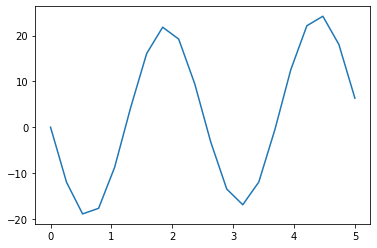

In [7]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

plt.plot(x, fx)
plt.show()

In [19]:
#Найдем варианты начальных x0 для optimize.minimize
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

a0 = -100
b0 = -100

goodTries = {}

for i in range (2000):
    if error([a0, b0]) < 240:
        goodTries[str([a0, b0])] = error([a0, b0])
        a0 += 0.1
        b0 += 0.1
    else:
        a0 += 0.1
        b0 += 0.1
        
goodTries

{'[1.2999999999985958, 1.2999999999985958]': 239.0570570600712,
 '[1.399999999998596, 1.399999999998596]': 234.97846225931872,
 '[1.499999999998596, 1.499999999998596]': 232.10771227838922,
 '[1.599999999998596, 1.599999999998596]': 230.4288886759933,
 '[1.6999999999985962, 1.6999999999985962]': 231.26744238036656,
 '[1.7999999999985963, 1.7999999999985963]': 236.40248614415125}

In [26]:
x0 = np.array([99, -99])

res = minimize(error, x0, method='nelder-mead', options={'xtol': 1e-8, 'disp': False})
res

 final_simplex: (array([[ -35.26875   , -119.2640625 ],
       [ -35.26875001, -119.2640625 ],
       [ -35.26875001, -119.2640625 ]]), array([244.50954835, 244.50954835, 244.50954835]))
           fun: 244.50954835
       message: 'Optimization terminated successfully.'
          nfev: 150
           nit: 42
        status: 0
       success: True
             x: array([ -35.26875  , -119.2640625])

Разные методы внутри функции minimize не дают значения меньше чем 228.3567196969465
В простой симуляции с разными значениями a и b ошибка также намного больше

Возможно, что-то не так с начальной функцией ?

Из x и fx видно, что f(0) = 0, подставив эти значения в начальную функцию получим: e^a = 0

f(5) ≈ 6.3, значит e^a * sin(b*x) ≈ 1,3, но синус ограничен по модулю единицей

4.

In [ ]:
uniform_rv = stats.uniform(loc=-50, scale=100)

m_list = []

for i in range(1000):
    data = uniform_rv.rvs(size=50)
    m_list.append(data.mean())
    
sns.histplot(x=m_list)

5.

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
m

In [ ]:
np.linalg.eig(m)

Решение на бумаге: https://drive.google.com/file/d/1oA407JMNSa42NQUknJbnQx4hI7E5d8Y5/view?usp=sharing

.